<h2>KNN알고리즘 테스트</h2>
<br>
데이터를 3개의 집단으로 형성되도록 각 50개씩 준비하고 중간 지역에서 약간 데이터가 섞이도록 한다<br>
KNN을 사용하여 학습을 수행하고 학습된 데이터를 사용하여 분류된 영역의 배경색을 서로 달리 설정한다<br>
<br>
교차검정을 수행할 때 가장 적합한 K값이 얼마인지 확인한다<br>
또 K 값에 따른 에러율도 시각화해본다

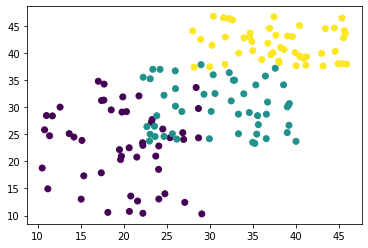

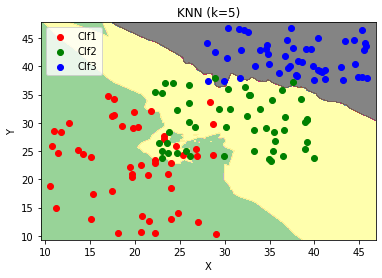

(array([0, 1, 2]), array([46, 53, 51], dtype=int64))
1 0.8533333333333333
2 0.8533333333333335
4 0.8800000000000001
5 0.86
7 0.8733333333333334
8 0.8866666666666667
10 0.9066666666666666
11 0.9
13 0.8800000000000001
14 0.86
16 0.8666666666666668
17 0.8533333333333335
19 0.8400000000000001
20 0.8666666666666668
22 0.8666666666666668
23 0.8600000000000001
25 0.8466666666666667
26 0.8533333333333333
28 0.8666666666666668
29 0.8600000000000001
31 0.8533333333333335
32 0.8733333333333334
34 0.8666666666666668
35 0.8666666666666668
37 0.8600000000000001
38 0.8600000000000001
40 0.8666666666666668
41 0.8600000000000001
43 0.8666666666666668
44 0.8666666666666668
46 0.8666666666666668
47 0.8733333333333334
49 0.8800000000000001
50 0.8733333333333334
52 0.8933333333333333
53 0.8866666666666667
55 0.8800000000000001
56 0.8866666666666667
58 0.8866666666666667
59 0.8800000000000001
61 0.8733333333333334
62 0.8666666666666668
64 0.8666666666666668
65 0.8666666666666666
67 0.8733333333333334
68 0.8

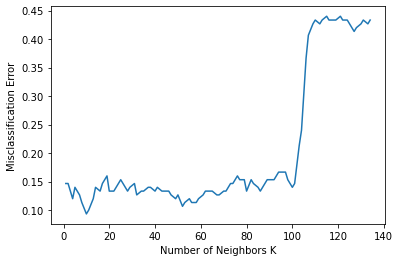

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x = []
y = []
clf = []
for i in range(100):
    x.append(20+np.random.uniform(-10,10) if i<50 else 30+np.random.uniform(-8,10))
    y.append(20+np.random.uniform(-10,15) if i<50 else 30+np.random.uniform(-7,8))
    clf.append(0 if i<50 else 1)
for i in range(100,150):
    x.append(40+np.random.uniform(-12,6))
    y.append(40+np.random.uniform(-3,7))
    clf.append(2)

plt.scatter(x,y,c=clf)
plt.show()

X = np.c_[x,y]
df = pd.DataFrame(np.c_[x,y,clf],columns=['x','y','clf'])

from sklearn.neighbors import KNeighborsClassifier
k = 5
#---instantiate learning model---
knn = KNeighborsClassifier(n_neighbors=k)
#---fitting the model---
knn.fit(X, clf)
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#---step size in the mesh---
h = (x_max / x_min)/100
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], ['Clf1','Clf2','Clf3']):
    plt.scatter(df.iloc[df['clf'].values==i, 0], df.iloc[df['clf'].values==i, 1], color=color, label=target)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()
predictions = knn.predict(X)
#--classifications based on predictions---
print(np.unique(predictions, return_counts=True))

from sklearn.model_selection import cross_val_score

#---holds the cv (cross-validates) scores---
cv_scores = []
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds))))
#---remove all multiples of 3---
ks = [k for k in ks if k % 3 != 0]
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    #---performs cross-validation and returns the average accuracy---
    scores = cross_val_score(knn, X, clf, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean)
    
#---calculate misclassification error for each k---
MSE = [1 - x for x in cv_scores]
#---determining best k (min. MSE)---
optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")
#---plot misclassification error vs k---
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

[ 7  1  6 11  8 10  8  1  6 11  6  7  5 11  4 11 13 14 11 11 14 16 13 14
 17 17 15 13 16 19 17 13 19 17 18 17 18 16 14 19]


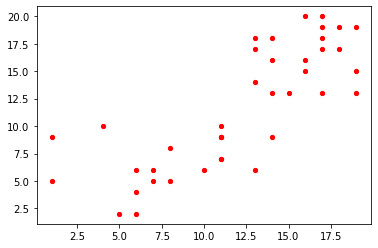

[[14.  2.]
 [ 1. 13.]]


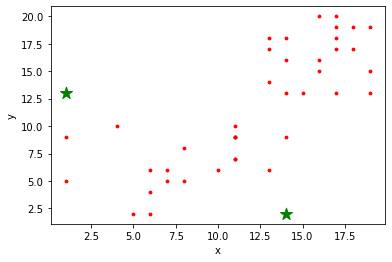

Plesae regenerate your centroids again.


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

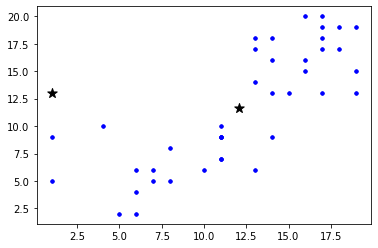

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []
x.append(np.random.randint(0,15,20))
y.append(np.random.randint(2,11,20))
x.append(np.random.randint(13,20,20))
y.append(np.random.randint(13,22,20))
x = np.ravel(x)
y = np.ravel(y)
print(x)
plt.scatter(x,y, c='r', s=18)
plt.show()

#---let k assume a value---
k = 2
#---create a matrix containing all points---
#X = np.array(list(zip(x,y)))
X = np.c_[x,y]
#print(X)
#---generate k random points (centroids)---
Cx = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size = k)
Cy = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size = k)
#---represent the k centroids as a matrix---
C = np.array(list(zip(Cx, Cy)), dtype=np.float64)
print(C)
#---plot the orginal points as well as the k centroids---
plt.scatter(x, y, c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

from copy import deepcopy
#---to calculate the distance between two points---
def euclidean_distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)
#---create a matrix of 0 with same dimension as C (centroids)---
C_prev = np.zeros(C.shape)
#---to store the cluster each point belongs to---
clusters = np.zeros(len(X))
#---C is the random centroids and C_prev is all 0s---
#---measure the distance between the centroids and C_prev---
distance_differences = euclidean_distance(C, C_prev)
#---loop as long as there is still a difference in
# distance between the previous and current centroids---
while distance_differences.any() != 0:
    #---assign each value to its closest cluster---
    for i in range(len(X)):
        distances = euclidean_distance(X[i], C)
    #---returns the indices of the minimum values along an axis---
    cluster = np.argmin(distances)
    clusters[i] = cluster
    #---store the prev centroids---
    C_prev = deepcopy(C)
    #---find the new centroids by taking the average value---
    for i in range(k): #---k is the number of clusters---
        #---take all the points in cluster i---
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points) != 0:
            C[i] = np.mean(points, axis=0)
    #---find the distances between the old centroids and the new centroids---
    distance_differences = euclidean_distance(C, C_prev)
#---plot the scatter plot---
colors = ['b','r','y','g','c','m']
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    else:
        # this means that one of the clusters has no points
        print("Plesae regenerate your centroids again.")
    plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    plt.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')

for i, cluster in enumerate(clusters):
    print("Point " + str(X[i]), "Cluster " + str(int(cluster)))


In [47]:
x = [7,3]
y = [4,5]

d = np.sqrt((x[0]-x[1])**2 + (y[0]-y[1])**2)
d


4.123105625617661

silhouette_samples----------
[ 0.46269942  0.49769391  0.46835015  0.39222073  0.4691553   0.36970058
  0.49398544  0.48432436  0.48679526  0.20668739  0.05300885  0.49408413
  0.48573374  0.42357523  0.43931485  0.28326438  0.49663443  0.26852026
  0.44923711  0.44601942 -0.09176625  0.46829019  0.46545418  0.42220768
  0.42929819  0.42732052  0.46262555  0.4208728   0.42712886  0.42864659
  0.07829227  0.44177052  0.22757801  0.41225215  0.40385877  0.43428537
  0.48465896  0.45498522  0.49589714  0.03259372  0.48321688  0.30506436
 -0.12715267  0.17203237  0.4696027   0.42035606  0.2713526   0.22172291
  0.3806334   0.49478253  0.42035445  0.0632449  -0.45187063  0.49557672
  0.25388195 -0.17226729  0.45877023  0.33329503  0.42092044  0.30243982
  0.48422305 -0.03677247  0.45416246 -0.11643698  0.24593962  0.33514516
  0.13235976  0.4268247   0.18721202  0.18253331  0.45605353  0.12566702
 -0.45369574  0.45122103  0.48529935  0.48519777  0.24640856  0.4299477
  0.43876423  0.5059691

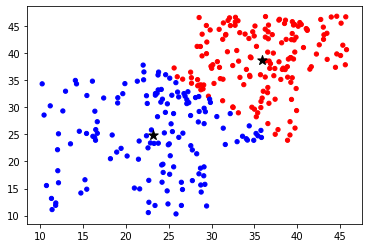

In [57]:
import numpy as np
import pandas as pd
import matplotlib

x = []
y = []

for i in range(200):
    x.append(20+np.random.uniform(-10,10) if i<100 else 30+np.random.uniform(-8,10))
    y.append(20+np.random.uniform(-10,15) if i<100 else 30+np.random.uniform(-7,8))
for i in range(200,300):
    x.append(40+np.random.uniform(-12,6))
    y.append(40+np.random.uniform(-3,7))
x = np.ravel(x)
y = np.ravel(y)

#---create a matrix containing all points---
X = np.c_[x,y]

from sklearn import metrics
silhouette_avgs = []
min_k = 2
#---try k from 2 to maximum number of labels---
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)
#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K)

from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)
print('silhouette_samples----------')
print(silhouette_samples)
print("Average of Silhouette Coefficients for k =", k)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())

#---using sci-kit-learn---
from sklearn.cluster import KMeans
k= Optimal_K
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print('Predicted labels:\n',labels)
print('Centroids:\n',centroids)

#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(x,y, c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')


가장 영향 큰 2 컬럼: air_pressure , min_wind_direction


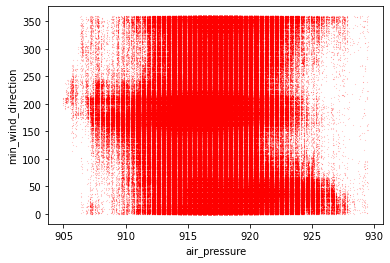

Predicted labels:
 [0 0 2 ... 2 2 2]
Centroids:
 [[918.0964555   43.12842052]
 [915.89458299 186.44608405]
 [917.45936295 315.2557351 ]]


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
df = pd.read_csv("minute_weather.csv")
del df['rowID']

top2 = df.corr().nlargest(3,'air_temp').drop('air_temp')
print('가장 영향 큰 2 컬럼:',top2.index[0],',',top2.index[1])  # air_pressure , min_wind_direction

df = df.dropna(subset=[top2.index[0],top2.index[1]]) # remove rows with NaNs

#---create a matrix containing all points---
X = np.c_[df[top2.index[0]],df[top2.index[1]]]
#---plot the orginal points as well as the k centroids---
plt.scatter(X[:,0], X[:,1], c='r', s=0.005)
plt.xlabel(top2.index[0])
plt.ylabel(top2.index[1])
plt.show()

"""from sklearn import metrics
silhouette_avgs = []
min_k = 2
#---try k from 2 to maximum number of labels---
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)
#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K)"""
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k= 3
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print('Predicted labels:\n',labels)
print('Centroids:\n',centroids)

#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(X[:,0], X[:,1], c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')


가장 영향 큰 2 컬럼: air_pressure , min_wind_direction


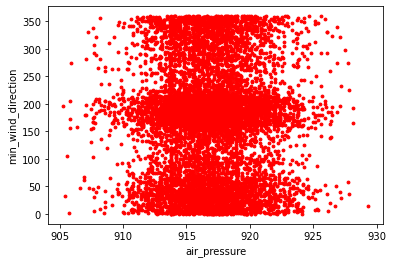

Silhouette Coefficients for k = 2 is 0.6472579384122652
Silhouette Coefficients for k = 3 is 0.717264520570157
Silhouette Coefficients for k = 4 is 0.5928870390305463
Silhouette Coefficients for k = 5 is 0.5682104422628927
Silhouette Coefficients for k = 6 is 0.5652653531916226
Silhouette Coefficients for k = 7 is 0.5529086825962484
Silhouette Coefficients for k = 8 is 0.5297256359253899
Silhouette Coefficients for k = 9 is 0.5331205507796126
Optimal K is 3
Predicted labels:
 [2 1 0 ... 0 2 0]
Centroids:
 [[916.82230606 186.62449216]
 [916.85550367  42.64509673]
 [916.81434806 316.25313693]]


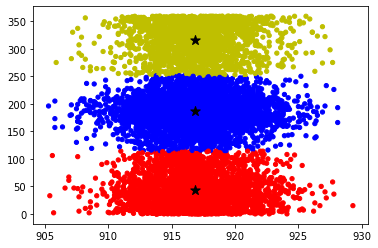

In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
df = pd.read_csv("minute_weather.csv")
del df['rowID']

top2 = df.corr().nlargest(3,'air_temp').drop('air_temp')
print('가장 영향 큰 2 컬럼:',top2.index[0],',',top2.index[1])  # air_pressure , min_wind_direction

df = df.dropna(subset=[top2.index[0],top2.index[1]]) # remove rows with NaNs
df.reset_index(inplace=True)
#---create a matrix containing all points---
X = np.c_[df[top2.index[0]][np.random.randint(0,len(df),10000)],df[top2.index[1]][np.random.randint(0,len(df),10000)]]
#---plot the orginal points as well as the k centroids---
plt.scatter(X[:,0], X[:,1], c='r', s=8)
plt.xlabel(top2.index[0])
plt.ylabel(top2.index[1])
plt.show()

from sklearn import metrics
silhouette_avgs = []
min_k = 2
#---try k from 2 to maximum number of labels---
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)
#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K)

#---using sci-kit-learn---
from sklearn.cluster import KMeans
k= Optimal_K
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print('Predicted labels:\n',labels)
print('Centroids:\n',centroids)

#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(X[:,0], X[:,1], c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')